# NN Moons Dataset Classification

In [1]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from binary_nn import BinaryNN
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# np.random.seed(1)

In [2]:
X_train = np.loadtxt("data-moons/x_train.csv")
y_train = np.loadtxt("data-moons/y_train.csv")

In [3]:
y_train = y_train.reshape(1, y_train.shape[0])

In [4]:
print(X_train.shape)
print(y_train.shape)

(2, 300)
(1, 300)


# Binary Neural Net

In [5]:
moons_nn = BinaryNN(X = X_train, Y = y_train)

Cost after epoch 0: 0.699346
Cost after epoch 1000: 0.130074
Cost after epoch 2000: 0.131207
Cost after epoch 3000: 0.135597
Cost after epoch 4000: 0.130206
Cost after epoch 5000: 0.129028
Cost after epoch 6000: 0.129911
Cost after epoch 7000: 0.129575
Cost after epoch 8000: 0.128571
Cost after epoch 9000: 0.129363


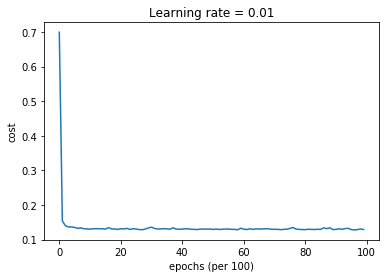

In [6]:
moons_nn.fit(layer_dimensions = [2, 5, 2, 1],
             optimizer = "adam",
             learning_rate = 0.01)

In [7]:
# moons_nn.L_layer_model(layer_dimensions = [2, 20, 7, 5, 1],
#                        print_cost = False,
#                        num_iterations = 50000,
#                        learning_rate = 0.02)

## Training Set Performance

In [8]:
pred_train = moons_nn.predict(X = X_train, y = y_train)

Accuracy: 0.9400000000000002


In [9]:
print("Precision:", precision_score(y_train[0], pred_train[0]))
print("Recall:", recall_score(y_train[0], pred_train[0]))

Precision: 0.9459459459459459
Recall: 0.9333333333333333


In [10]:
tn, fp, fn, tp = confusion_matrix(y_train[0], pred_train[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.473333,0.026667
label: 1,0.033333,0.466667
